## Database Name: Wine
## Database URL: https://archive.ics.uci.edu/dataset/109/wine
**Input variables:**
- fixed acidity: most acids involved with wine or fixed or nonvolatile
- volatile acidity: the amount of acetic acid in wine
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- total sulfur dioxide: amount of free and bound forms of S02
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
- alcohol: the percent alcohol content of the wine

**Output variable:**
- quality (score between 0 and 10)

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#data reading
data = pd.read_csv(r'data/winequality-red.csv', sep=';')

In [12]:
#Shape of dataset
print(data.shape)

(1599, 12)


In [13]:
#Columns of dataset
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [14]:
#Rename columns of dataset into standard format
renamed_columns = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'chlorides': 'chlorides',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    'density': 'density',
    'pH': 'ph',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol',
    'quality': 'quality'
}
data.rename(columns=renamed_columns, inplace=True)

In [15]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [17]:
#Check null value
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
#Get summary information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


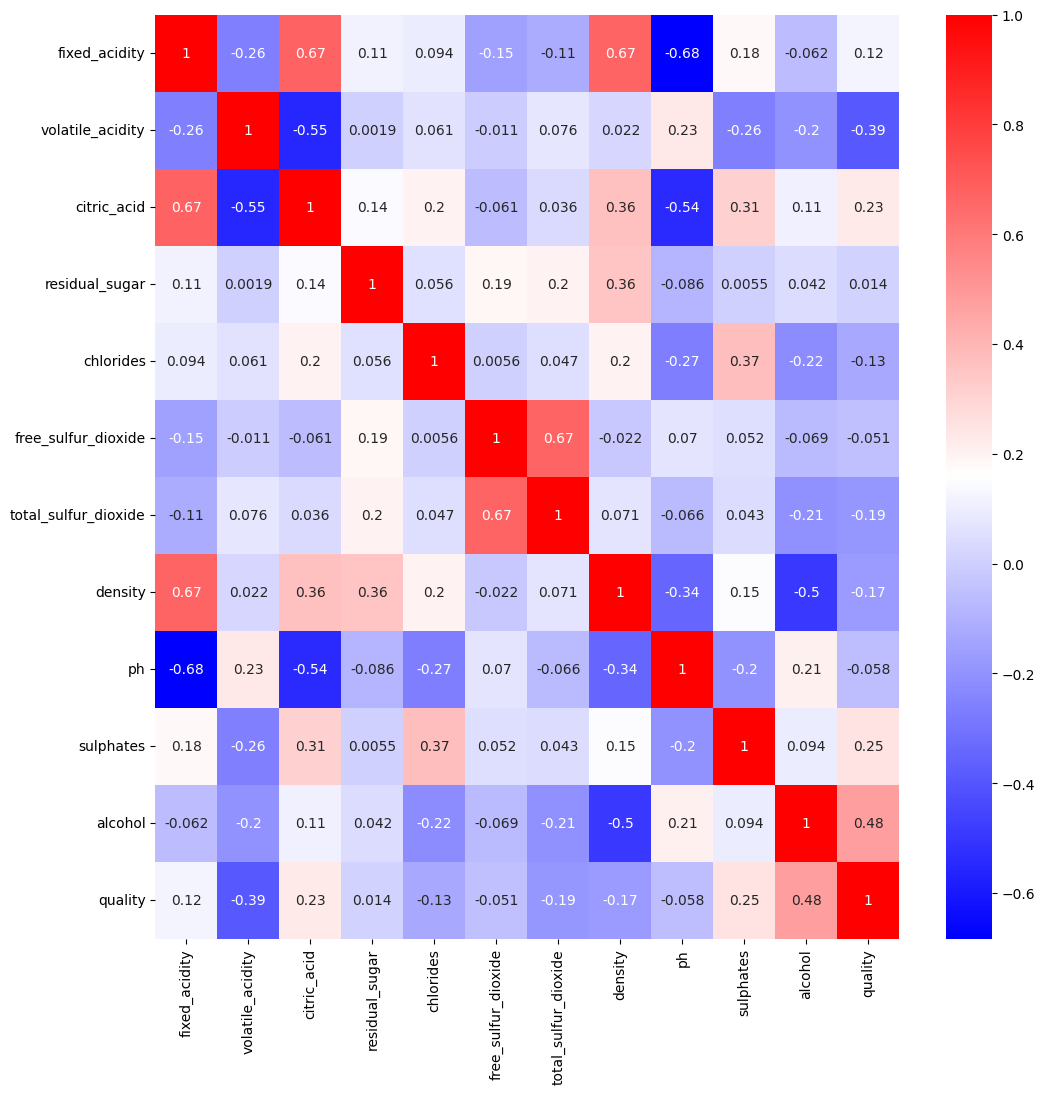

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(),annot=True,cmap="bwr")
plt.show()

In [19]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
#Select top variables
top_variables = ['volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol', 'quality']
data = data[top_variables]

In [21]:
#Generate summary statistics for three key variables.
key_variables = ['volatile_acidity', 'sulphates', 'alcohol']
data[key_variables].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile_acidity,1599.0,0.527821,0.179060,0.12,0.39,0.52,0.64,1.58
sulphates,1599.0,0.658149,0.169507,0.33,0.55,0.62,0.73,2.00
alcohol,1599.0,10.422983,1.065668,8.40,9.50,10.20,11.10,14.90


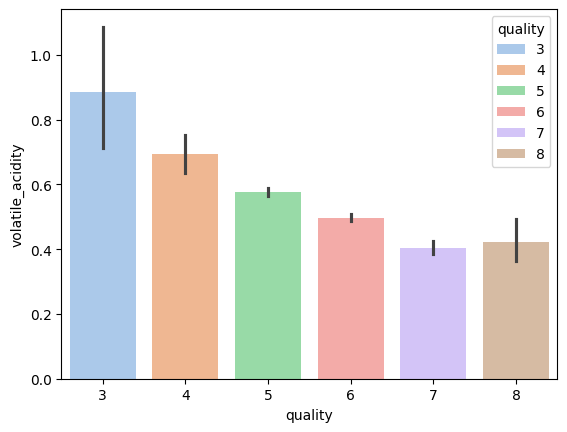

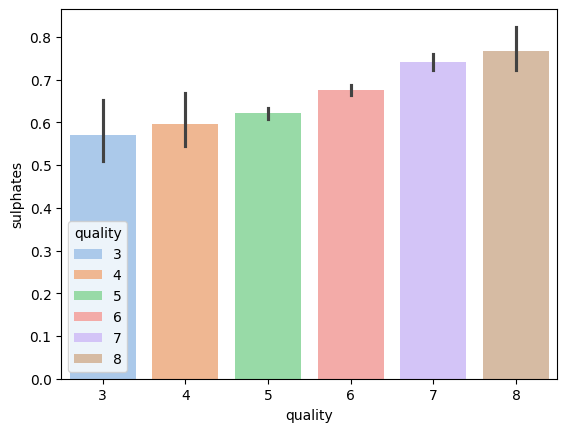

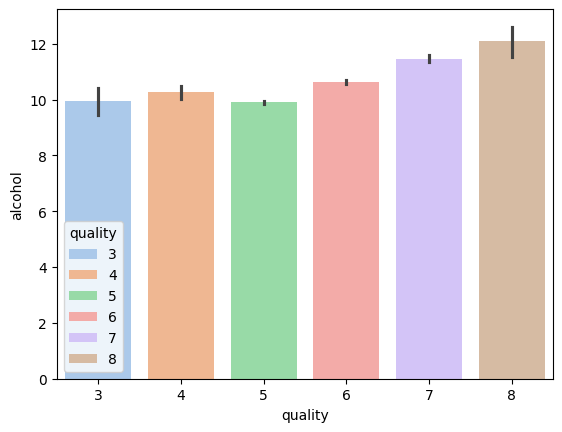

In [68]:
for i in key_variables:
    if i == "quality":
        break
    sns.barplot(x="quality",y = i,data=data ,palette ='pastel', hue="quality")
    plt.show()

In [77]:
data['quality'].unique()

array([0, 1])

We can transform column quality to binary value:
 - If the quality value is less than or eqaul to 6 then 'Low'
 - If quality value is greater than 6 then 'High'

In [22]:
data['quality'] = np.where(data['quality'] > 6, 'High', 'Low')
data['quality'].value_counts()

quality
Low     1382
High     217
Name: count, dtype: int64

In [23]:
data

,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,Low
1,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,Low
2,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,Low
3,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,Low
4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,Low
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,Low
1595,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,Low
1596,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,Low
1597,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,Low
